/tmp/ipykernel_125266/1491984773.py:9: RuntimeWarning: overflow encountered in cos
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_125266/1491984773.py:9: RuntimeWarning: overflow encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_125266/1491984773.py:9: RuntimeWarning: invalid value encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)


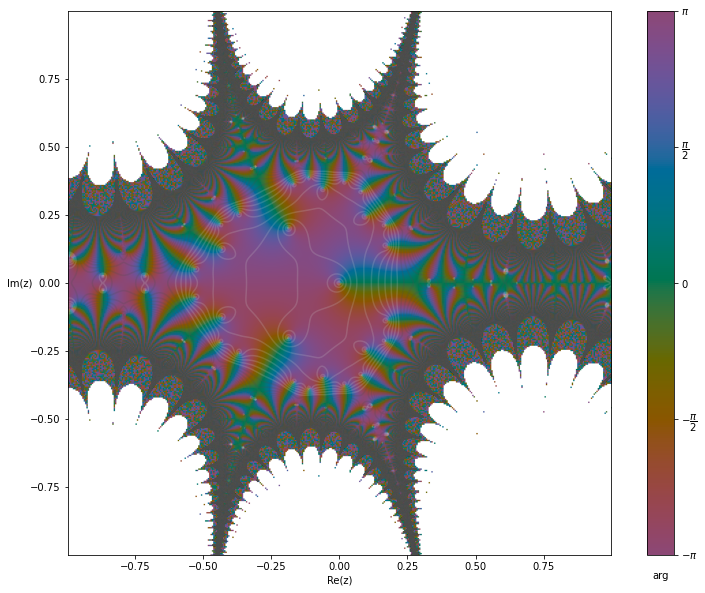

In [81]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

import cplot


def f(x):
    return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)

def f_2(x):
    return f(f(f(x)))


plt = cplot.plot_arg(
    f_2,
    (-1, 1, 400),
    (-1, 1, 400),
)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

import cplot


def collatz_extension(x):
    return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)

def f_2(x):
    return f(f(f(x)))


plt = cplot.plot_arg(
    f_2,
    (-1, 1, 1000),
    (-1, 1, 1000),
)
plt.show()

NameError: name 'f' is not defined

In [44]:
f(5+0j)

(16+0j)

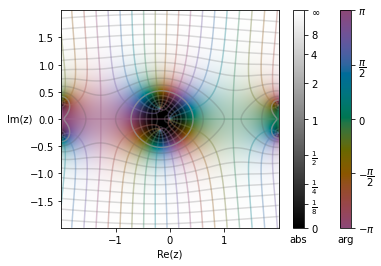

In [19]:

plt = cplot.plot(
    f,
    (-2.0, +2.0, 1000),
    (-2.0, +2.0, 1000),
    contours_arg=(0, 1/4 * np.pi, 2/4 * np.pi, 3/4 * np.pi, 4/4 * np.pi, 5/4 * np.pi, 6/4 * np.pi, 7/4 * np.pi),
    # abs_scaling=lambda x: x / (x + 1),  # how to scale the lightness in domain coloring
    # contours_abs=2.0,
    #contours_arg=(0, np.pi / 2, np.pi, (3/4) * np.pi),
    # emphasize_abs_contour_1: bool = True,
    # add_colorbars: bool = True,
    # add_axes_labels: bool = True,
    # saturation_adjustment: float = 1.28,
    # min_contour_length = None,
    # linewidth = None,
)
plt.show()

In [34]:
type(plt)

module

In [18]:
import numpy as np 

def collatz_extension(x):
    return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)

def julia_set(xrange, yrange, stop_iterations, threshold = 1):
    ''' A function to determine the values of the Julia set. Takes
    an array size specified by h_range and w_range, in pixels, along
    with the number of maximum iterations to try.  Returns an array with 
    the number of the last bounded iteration at each array value.
    '''
    # top left to bottom right
    x, y = np.ogrid[xrange[0]: xrange[1]: xrange[2]*1j, yrange[0]: yrange[1]: yrange[2]*1j]
    z_array = x + y*1j
    iterations_till_divergence = stop_iterations + np.zeros(z_array.shape)

    not_already_diverged = np.full(z_array.shape, True)
    diverged_in_past = np.full(z_array.shape, False)
    
    for i in range(stop_iterations):
        z_new = collatz_extension(z_array)
        z_diff = z_new - z_array
        diverging = (np.real(z_diff) > threshold) | (np.imag(z_diff) > threshold)
        z_array = z_new
        
        #z_array = collatz_extension(z_array)
        
        #z_size_array = z_array * np.conj(z_array)
        #diverging = z_size_array > 100000

        diverging_now = diverging & not_already_diverged
        iterations_till_divergence[diverging_now] = i

        not_already_diverged = np.invert(diverging_now) & not_already_diverged
        # prevent overflow (values headed towards infinity) for diverging locations
        diverged_in_past = diverged_in_past | diverging_now
        z_array[diverged_in_past] = 0

    return np.transpose(iterations_till_divergence)

iterations = julia_set(xrange = (-9, -7, 5000), yrange = (-0.5, 0.5, 5000), stop_iterations = 2000, threshold = 1)

/tmp/ipykernel_167784/3417700753.py:4: RuntimeWarning: overflow encountered in cos
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_167784/3417700753.py:4: RuntimeWarning: overflow encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_167784/3417700753.py:4: RuntimeWarning: invalid value encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_167784/3417700753.py:4: RuntimeWarning: invalid value encountered in cos
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_167784/3417700753.py:4: RuntimeWarning: invalid value encountered in subtract
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)


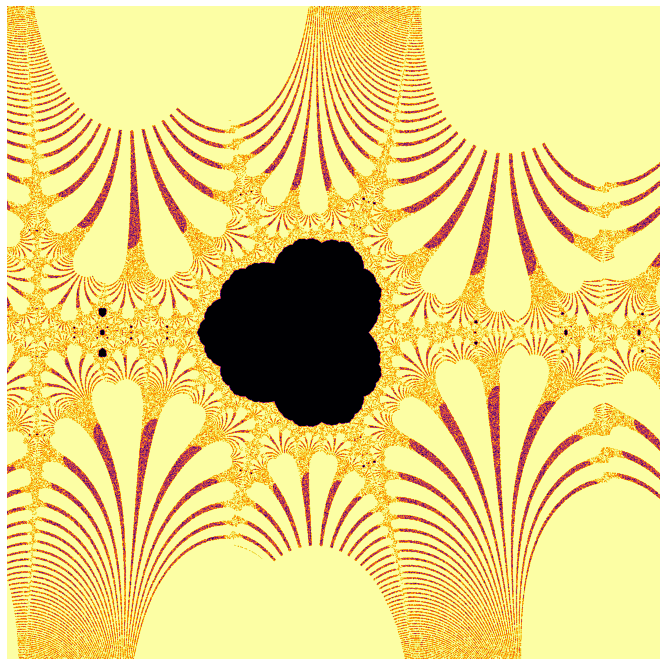

In [105]:
plt.imshow(iterations*-1, cmap = 'inferno')
plt.axis('off')
plt.show()
plt.close()

<IPython.core.display.Javascript object>


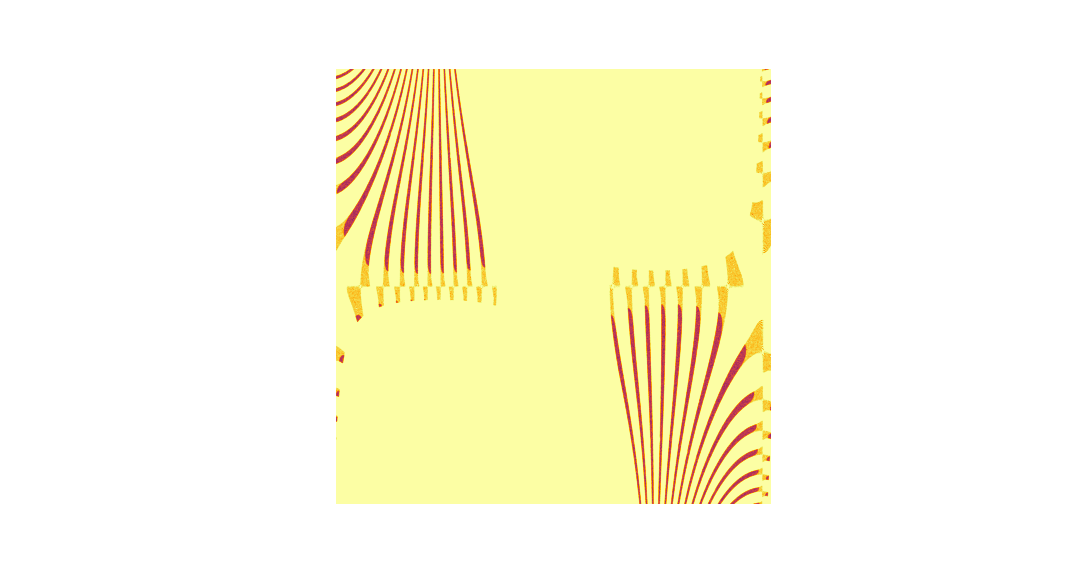

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.imshow(iterations*-1, cmap = 'inferno')
plt.axis('off')
plt.show()